In [16]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg
import datetime as dt

In [3]:
btc = pd.read_csv(r'C:\Users\local123\Desktop\Ironhack\DAFT_257\module_2\Lab_22_Time-Series-Models\BTC-USD.csv', index_col='Date', parse_dates=True) 
# choosing index and indicating it's a date format 

In [19]:
btc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800
...,...,...,...,...,...,...
2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,50640.417969,24324345758
2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883
2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299


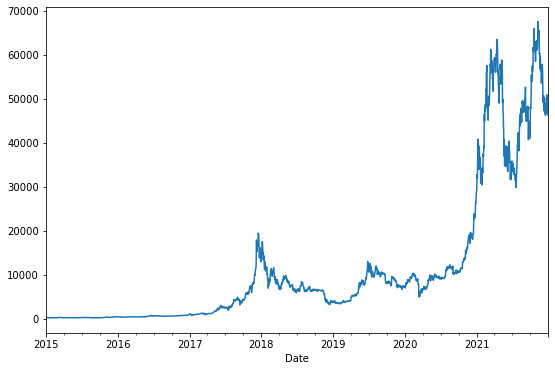

In [6]:
btc['Close'].plot(figsize=(9, 6))
plt.show()

In [6]:
# checking stationary data 
# Import adfuller

result = adfuller(btc.Close)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])


ADF Test Statistic: -0.49
5% Critical Value: -2.86
p-value: 0.89


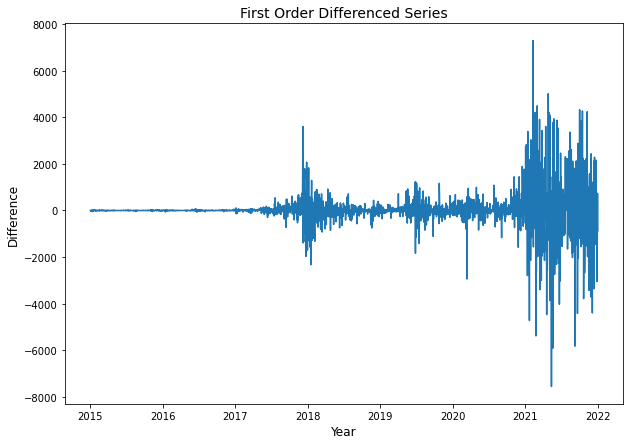

In [24]:
# data in non stationary P-VALUE > 0.05
# Change for (t)th day is Close for (t)th day minus Close for (t-1)th day.
btc['Diff'] = btc['Close'].diff()

# Plot the Change
plt.figure(figsize=(10, 7))
plt.plot(btc['Diff'])
plt.title('First Order Differenced Series', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.show()

In [8]:
btc

,Open,High,Low,Close,Adj Close,Volume,Difference
Date,,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550,NaN
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650,0.783020
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,-33.950012
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100,-16.886994
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800,10.278992
...,...,...,...,...,...,...,...
2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,50640.417969,24324345758,-169.097656
2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883,-3051.562500
2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299,-1144.144531


In [9]:
result = adfuller(btc.Difference.dropna())
print(result)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

(-7.859861938814749, 5.319827990868769e-12, 27, 2528, {'1%': -3.432939379929173, '5%': -2.862683979868293, '10%': -2.5673789838429837}, 40754.75329762928)
ADF Test Statistic: -7.86
5% Critical Value: -2.86
p-value: 0.00


In [10]:
# p-value is normalized
btc

,Open,High,Low,Close,Adj Close,Volume,Difference
Date,,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550,NaN
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650,0.783020
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,-33.950012
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100,-16.886994
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800,10.278992
...,...,...,...,...,...,...,...
2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,50640.417969,24324345758,-169.097656
2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883,-3051.562500
2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299,-1144.144531


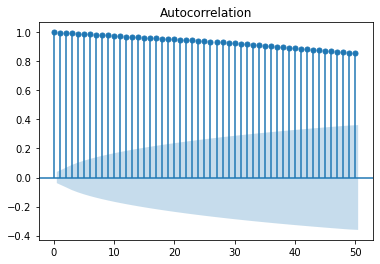

In [22]:

# Use the Autocorrelation function
# from the statsmodel library passing
# our DataFrame object in as the data
# Note: Limiting Lags to 50
plot_acf(btc['Close'], lags = 50)
# Show the AR as a plot
plt.show()

In [25]:
# splitting data 
#now we split data, to create model and do prediction
import numpy as np
from sklearn.model_selection import train_test_split
train, test = train_test_split(btc['Diff'])

In [33]:
train_set

,Open,High,Low,Close,Adj Close,Volume,Difference
Date,,,,,,,
2017-04-23,1231.920044,1232.199951,1203.939941,1207.209961,1207.209961,258951008,-24.500000
2017-04-24,1209.630005,1250.939941,1209.630005,1250.150024,1250.150024,235806000,42.940063
2017-04-25,1250.449951,1267.579956,1249.969971,1265.489990,1265.489990,242556000,15.339966
2017-04-26,1265.989990,1294.829956,1265.930054,1281.079956,1281.079956,329631008,15.589966
2017-04-27,1281.880005,1319.699951,1281.300049,1317.729980,1317.729980,449196992,36.650024
...,...,...,...,...,...,...,...
2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,50640.417969,24324345758,-169.097656
2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883,-3051.562500
2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299,-1144.144531


In [34]:
test_set

,Open,High,Low,Close,Adj Close,Volume,Difference
Date,,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550,NaN
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650,0.783020
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,-33.950012
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100,-16.886994
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800,10.278992
...,...,...,...,...,...,...,...
2017-04-18,1193.770020,1217.569946,1193.770020,1211.670044,1211.670044,270524000,17.760010
2017-04-19,1212.130005,1215.510010,1205.079956,1210.290039,1210.290039,288060992,-1.380005
2017-04-20,1211.079956,1240.790039,1208.410034,1229.079956,1229.079956,315108000,18.789917


In [35]:
# implement model on train set
# Try a AR(4) model
from statsmodels.regression.linear_model import yule_walker
rho, sigma = yule_walker(train_set['Close'], 2)
print(f'rho: {-rho}')
print(f'sigma: {sigma}')
# sigma? 
# rho?  

rho: [-0.98700268 -0.010951  ]
sigma: 1100.1573680572128


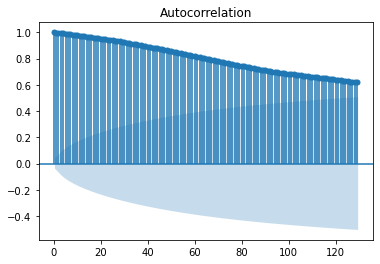

In [20]:
from statsmodels.graphics.tsaplots import plot_acf
# Calculate the ACF (via statsmodel)
plot_acf(btc['Close'], lags=129)
# Show the data as a plot (via matplotlib)
plt.show()

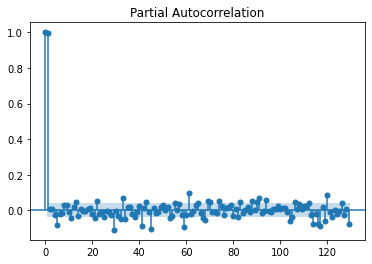

In [21]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
plot_pacf(btc['Close'], alpha =0.05, lags=129)
plt.show()

In [26]:
train.sort_index() #We need to sort car la fonction prend 25% eT 75% au hazard et donc en desordre ( pas possible ensuite de faire des predictions

Date
2015-01-01            NaN
2015-01-02       0.783020
2015-01-03     -33.950012
2015-01-05      10.278992
2015-01-06      11.714996
                 ...     
2021-12-24      37.656250
2021-12-26     379.656250
2021-12-27    -169.097656
2021-12-28   -3051.562500
2021-12-29   -1144.144531
Name: Diff, Length: 1917, dtype: float64

In [28]:
index= btc.shape[0]-500
train, test = btc['Diff'][0:index], btc['Diff'][index:]

In [29]:
test

Date
2020-08-19    -232.950195
2020-08-20     120.088867
2020-08-21    -285.882812
2020-08-22      89.335937
2020-08-23     -16.977539
                 ...     
2021-12-27    -169.097656
2021-12-28   -3051.562500
2021-12-29   -1144.144531
2021-12-30     733.414062
2021-12-31    -871.679687
Name: Diff, Length: 500, dtype: float64

In [30]:
test.index[0]

Timestamp('2020-08-19 00:00:00')

In [31]:
from statsmodels.tsa.arima_model import ARMA
train=train.dropna()
model1 = ARMA(train, order=(1,1))
result = model1.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D wil

In [32]:
from statsmodels.tools.eval_measures import rmse
pred1=result.predict(start=test.index[0], end=test.index[-1], exog=test)
pred1

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:827: SpecificationWarning: 
The number of observations in exog does not match the number of out-of-sample
observations.  This might indicate that exog is not correctly aligned. exog
should be aligned so that the exog[0] is used for the first out-of-sample
forecast, and exog[-1] is used for the last out-of-sample forecast.
exog is not used for in-sample observations which are the fitted values.

To silence this warning, ensure the number of observation in exog (500)
matches the number of out-of-sample forecasts (500)'

  warnings.warn(msg, SpecificationWarning)


2020-08-19    -5.115070
2020-08-20    13.943893
2020-08-21    -0.648928
2020-08-22    10.524314
2020-08-23     1.969331
                ...    
2021-12-27     5.679129
2021-12-28     5.679129
2021-12-29     5.679129
2021-12-30     5.679129
2021-12-31     5.679129
Freq: D, Length: 500, dtype: float64

In [33]:
from statsmodels.tools.eval_measures import rmse
rmse1 = rmse(pred1[1], test)
rmse1

1649.9843567373562

In [34]:
model2 = ARMA(train, order=(6,2))
result2 = model2.fit()
pred2=result2.predict()
rmse2 = rmse(pred2[1], test)
rmse2

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


1650.2818915030564

In [35]:
from statsmodels.tsa.arima.model import ARIMA
model3 = ARIMA(train, order=(5,1,0))
result3 = model3.fit()
pred3=result3.predict()
rmse3 = rmse(pred2[1], test)
rmse3

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


1650.2818915030564

<AxesSubplot:xlabel='Date'>

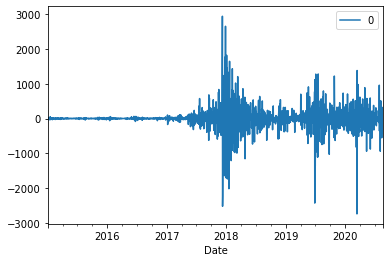

In [36]:
from pandas import DataFrame
residuals = DataFrame(result3.resid)
residuals.plot()